# Aims of this script

1. Time-series visualisation of water levels
2. Calculating single value to use for interpolation approach
3. Any other time series analysis

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
figures_directory = r'C:\Users\mar886\WaterTableProject\Willunga\willunga_wt\figures'

## Set up data

In [3]:
SAWaCoFolder = r'C:\Users\mar886\WaterTableProject\Willunga\willunga_wt\input_data\McLaren_SAWaterConnect'
constr_details = pd.read_csv(os.path.join(SAWaCoFolder, 'constructiondetails.csv'))
water_level = pd.read_csv(os.path.join(SAWaCoFolder, 'waterlevel.csv'))
well_summary = pd.read_csv(os.path.join(SAWaCoFolder, 'wellsummary.csv'))

In [4]:
well_summary.head(2)

,DHNO,Unit_No,Unit_Number,dh_name,network,Obs_No,drillhole_class,water_point_type_code,Aquifer,Orig_drilled_depth,...,map_50k,map_10k,map_2_5k,map_1k,water_info,salinity,water_chemistry,geophys_log,drill_log,lith_log
0,26532,6527-536,652700536,STREAM SAMPLING,MCL_VALE,WLG036,WP,RIV,NaN,NaN,...,2,35,l,1,Y,Y,N,N,N,N
1,26542,6527-546,652700546,STREAM SAMPLING,MCL_VALE,WLG035,WP,RIV,NaN,NaN,...,2,35,c,6,Y,Y,N,N,N,N


In [34]:
print(well_summary.columns)

Index(['DHNO', 'Unit_No', 'Unit_Number', 'dh_name', 'network', 'Obs_No',
       'drillhole_class', 'water_point_type_code', 'Aquifer',
       'Orig_drilled_depth', 'Orig_drilled_date', 'max_drill_depth',
       'max_drill_date', 'late_open_depth', 'late_open_date', 'late_permit_no',
       'cased_to', 'case_min_diam', 'purpose', 'latest_status',
       'latest_status_date', 'dtw', 'swl', 'rswl', 'water_level_date', 'TDS',
       'EC', 'salinity_date', 'pH', 'pH_date', 'yield', 'yield_date',
       'mga_easting', 'mga_northing', 'mga_zone', 'long_degrees',
       'long_minutes', 'long_seconds', 'lat_degrees', 'lat_minutes',
       'lat_seconds', 'decimal_long', 'decimal_lat', 'neg_decimal_lat',
       'hundred', 'plan', 'parcel', 'Title', 'map_250k', 'map_100k', 'map_50k',
       'map_10k', 'map_2_5k', 'map_1k', 'water_info', 'salinity',
       'water_chemistry', 'geophys_log', 'drill_log', 'lith_log', 'geometry'],
      dtype='object')


In [25]:
well_summary["geometry"] = [Point(x, y) for x, y in zip(well_summary.mga_easting, well_summary.mga_northing)]

C:\Users\mar886\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [27]:
well_summary_gdf = gpd.GeoDataFrame(well_summary, geometry='geometry', crs= 'epsg:32754')

print(well_summary_gdf.head(2))

    DHNO   Unit_No  Unit_Number          dh_name   network  Obs_No  \
0  26532  6527-536    652700536  STREAM SAMPLING  MCL_VALE  WLG036   
1  26542  6527-546    652700546  STREAM SAMPLING  MCL_VALE  WLG035   

  drillhole_class water_point_type_code Aquifer  Orig_drilled_depth  ...  \
0              WP                   RIV     NaN                 NaN  ...   
1              WP                   RIV     NaN                 NaN  ...   

  map_10k  map_2_5k map_1k  water_info salinity  water_chemistry  geophys_log  \
0      35         l      1           Y        Y                N            N   
1      35         c      6           Y        Y                N            N   

   drill_log lith_log                        geometry  
0          N        N  POINT (268590.320 6087490.740)  
1          N        N  POINT (268746.240 6089768.710)  

[2 rows x 61 columns]


In [28]:
water_level.head(2)

,DHNO,network,Unit_Number,Aquifer,Easting,Northing,Zone,Unit_No,Obs_No,obs_date,...,swl,rswl,pressure,temperature,dry_ind,anom_ind,pump_ind,measured_during,data_source,Comments
0,26532,MCL_VALE,652700536,NaN,268590.32,6087490.74,54,6527-536,WLG036,03/03/1975,...,NaN,NaN,NaN,NaN,Y,N,N,U,DEWNR,NaN
1,26532,MCL_VALE,652700536,NaN,268590.32,6087490.74,54,6527-536,WLG036,10/03/1975,...,NaN,NaN,NaN,NaN,Y,N,N,U,DEWNR,NaN


## Plot location of wells

Text(84.43555954403271, 0.5, 'Northing')

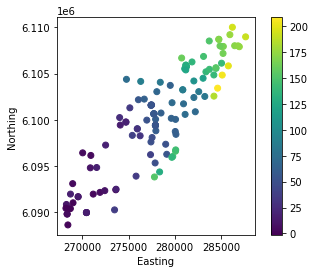

In [37]:
well_summary_gdf.plot(column="rswl", legend=True)
plt.xlabel("Easting")
plt.ylabel("Northing")

In [66]:
well_summary_gdf['water_level_date']

well_summary_gdf_new_wl = well_summary_gdf.copy()

for ix in well_summary_gdf_new_wl.index:
    obs_date = well_summary_gdf_new_wl.loc[ix, 'water_level_date']
    print(obs_date)
    print(type(obs_date))
    print(pd.isna(obs_date))

7/07/1975
<class 'str'>
False
7/07/1975
<class 'str'>
False
12/04/1991
<class 'str'>
False
10/09/2021
<class 'str'>
False
8/09/2021
<class 'str'>
False
10/09/2021
<class 'str'>
False
15/10/1977
<class 'str'>
False
15/05/1974
<class 'str'>
False
10/09/2021
<class 'str'>
False
nan
<class 'float'>
True
17/08/1989
<class 'str'>
False
20/12/2011
<class 'str'>
False
19/11/2021
<class 'str'>
False
10/09/2021
<class 'str'>
False
10/09/2021
<class 'str'>
False
10/09/2021
<class 'str'>
False
10/09/2021
<class 'str'>
False
28/01/2011
<class 'str'>
False
28/01/2011
<class 'str'>
False
8/09/2021
<class 'str'>
False
8/09/2021
<class 'str'>
False
28/01/2011
<class 'str'>
False
8/09/2021
<class 'str'>
False
8/09/2021
<class 'str'>
False
10/09/2021
<class 'str'>
False
10/09/2021
<class 'str'>
False
10/09/2021
<class 'str'>
False
16/11/2010
<class 'str'>
False
8/09/2021
<class 'str'>
False
10/09/2021
<class 'str'>
False
13/09/2021
<class 'str'>
False
25/07/2013
<class 'str'>
False
nan
<class 'float'>
Tr

In [54]:
print(pd.isna('nan'))

False


## Need to change the obs date to date time format so I can search dates earlier than  

Need to first remove NAN values

In [59]:
well_summary_gdf_new_wl = well_summary_gdf_new_wl[well_summary_gdf_new_wl['water_level_date'].notna()]

print(len(well_summary_gdf))
print(len(well_summary_gdf_new_wl))

148
140


In [67]:
well_summary_gdf_new_wl["ObsDate"] = pd.to_datetime(well_summary_gdf_new_wl["water_level_date"])

for ix in well_summary_gdf_new_wl.index:
    obs_date = well_summary_gdf_new_wl.loc[ix, 'ObsDate']
    print(obs_date)
    print(type(obs_date))
    print(pd.isna(obs_date))

1975-07-07 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
1975-07-07 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
1991-12-04 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
2021-10-09 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
2021-08-09 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
2021-10-09 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
1977-10-15 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
1974-05-15 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
2021-10-09 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
NaT
<class 'pandas._libs.tslibs.nattype.NaTType'>
True
1989-08-17 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
2011-12-20 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
2021-11-19 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
False
2021-10-09 00:00:00
<

## Only get dates that are this year - so that they are consistent

25


<AxesSubplot:>

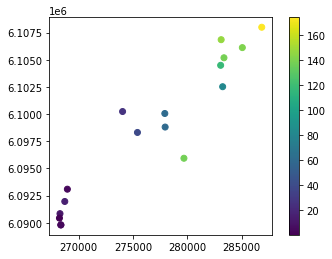

In [71]:
startdate = '2021-01-01 00:00:00'

well_summary_gdf_new_wl = well_summary_gdf_new_wl[well_summary_gdf_new_wl['water_level_date'] > startdate]

print(len(well_summary_gdf_new_wl))

well_summary_gdf_new_wl.plot(column="rswl", legend=True)


## Create plots of water levels

Ensure only plotting where there are data - some of the wells there are no time series water level data available

In [87]:
idx = well_summary.index[0]

for idx in well_summary.index:
    print(idx)

    df = water_level.copy()
    df = df[df["DHNO"]==idx]
    #df = water_level[water_level["DHNO"]==idx]
    df["Datetime"] = pd.to_datetime(df["obs_date"])
    #print(df["rswl"])
    #print(df["rswl"].isnull())

    if (len(df) > 0) and (sum(~df["rswl"].isnull())>0):
        print("Some data exist")
        print(len(df))
        fig, axes = plt.subplots(1,1)
        df.plot("Datetime", "rswl", ax=axes, marker='+', ls="--",
                        markeredgecolor="0.1", label = idx) 
        #ax1.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2020-01-01'))
        axes.set_ylabel("RSWL (m AHD)")
        nm = "wl_%s" %idx
        plt.savefig(os.path.join(figures_directory, nm))
        plt.close()
    else:
        print("No data available for well: %s" %idx)
        pass

26532
No data available for well: 26532
26542
No data available for well: 26542
26547
Some data exist
210
26548
Some data exist
441
26558
Some data exist
459
26565
Some data exist
417
26567
Some data exist
13
26568
Some data exist
2
26585
Some data exist
335
26588
No data available for well: 26588
27020
Some data exist
16
27048
Some data exist
212
27050
Some data exist
283
27063
Some data exist
289
27099
Some data exist
249
27107
Some data exist
129
27108
Some data exist
123
27110
Some data exist
90
27111
Some data exist
90
27112
Some data exist
125
27113
Some data exist
129
27114
Some data exist
91
27116
Some data exist
131
27117
Some data exist
129
27118
Some data exist
130
27119
Some data exist
124
27121
Some data exist
129
27124
Some data exist
79
27125
Some data exist
118
39875
Some data exist
331
39932
Some data exist
347
39970
Some data exist
280
39988
No data available for well: 39988
39995
No data available for well: 39995
40002
Some data exist
103
40003
Some data exist
109
40

## Calculate average water levels 

Plot different averages depending on certain things